**Лабораторная работа №2**

**Задача:** *провести визуальный анализ данных*

Импортируем нужные нам библиотеки, скачаем данные и разделим их на тестовые и тренировочные

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
data.info()

X = data[data.columns[1:]]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


Проверим какие признаки имееют наибольшую корреляцию с целевой переменной

In [2]:
correlations_data = data.corr()['Class'].sort_values()
print(correlations_data)

Flavanoids                     -0.847498
OD280/OD315 of diluted wines   -0.788230
Total phenols                  -0.719163
Proline                        -0.633717
Hue                            -0.617369
Proanthocyanins                -0.499130
Alcohol                        -0.328222
Magnesium                      -0.209179
Ash                            -0.049643
Color intensity                 0.265668
Malic acid                      0.437776
Nonflavanoid phenols            0.489109
Alcalinity of ash               0.517859
Class                           1.000000
Name: Class, dtype: float64


Проведем визуальный анализ наших данных

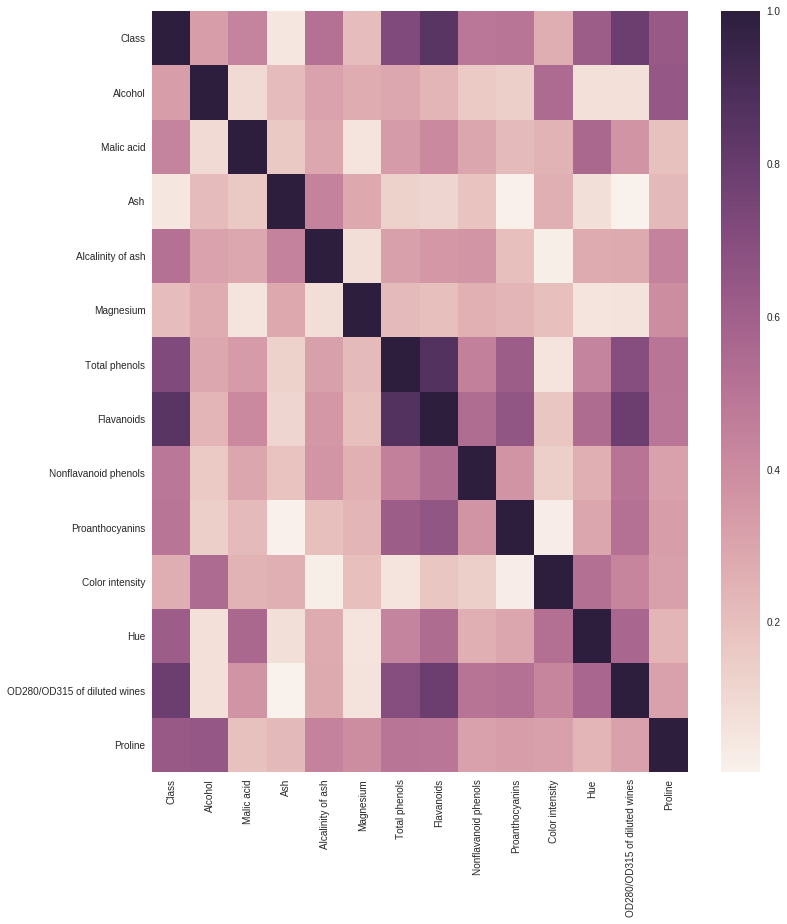

In [3]:
corr = data.corr().abs()
sns.set(rc={'figure.figsize':(12, 14)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


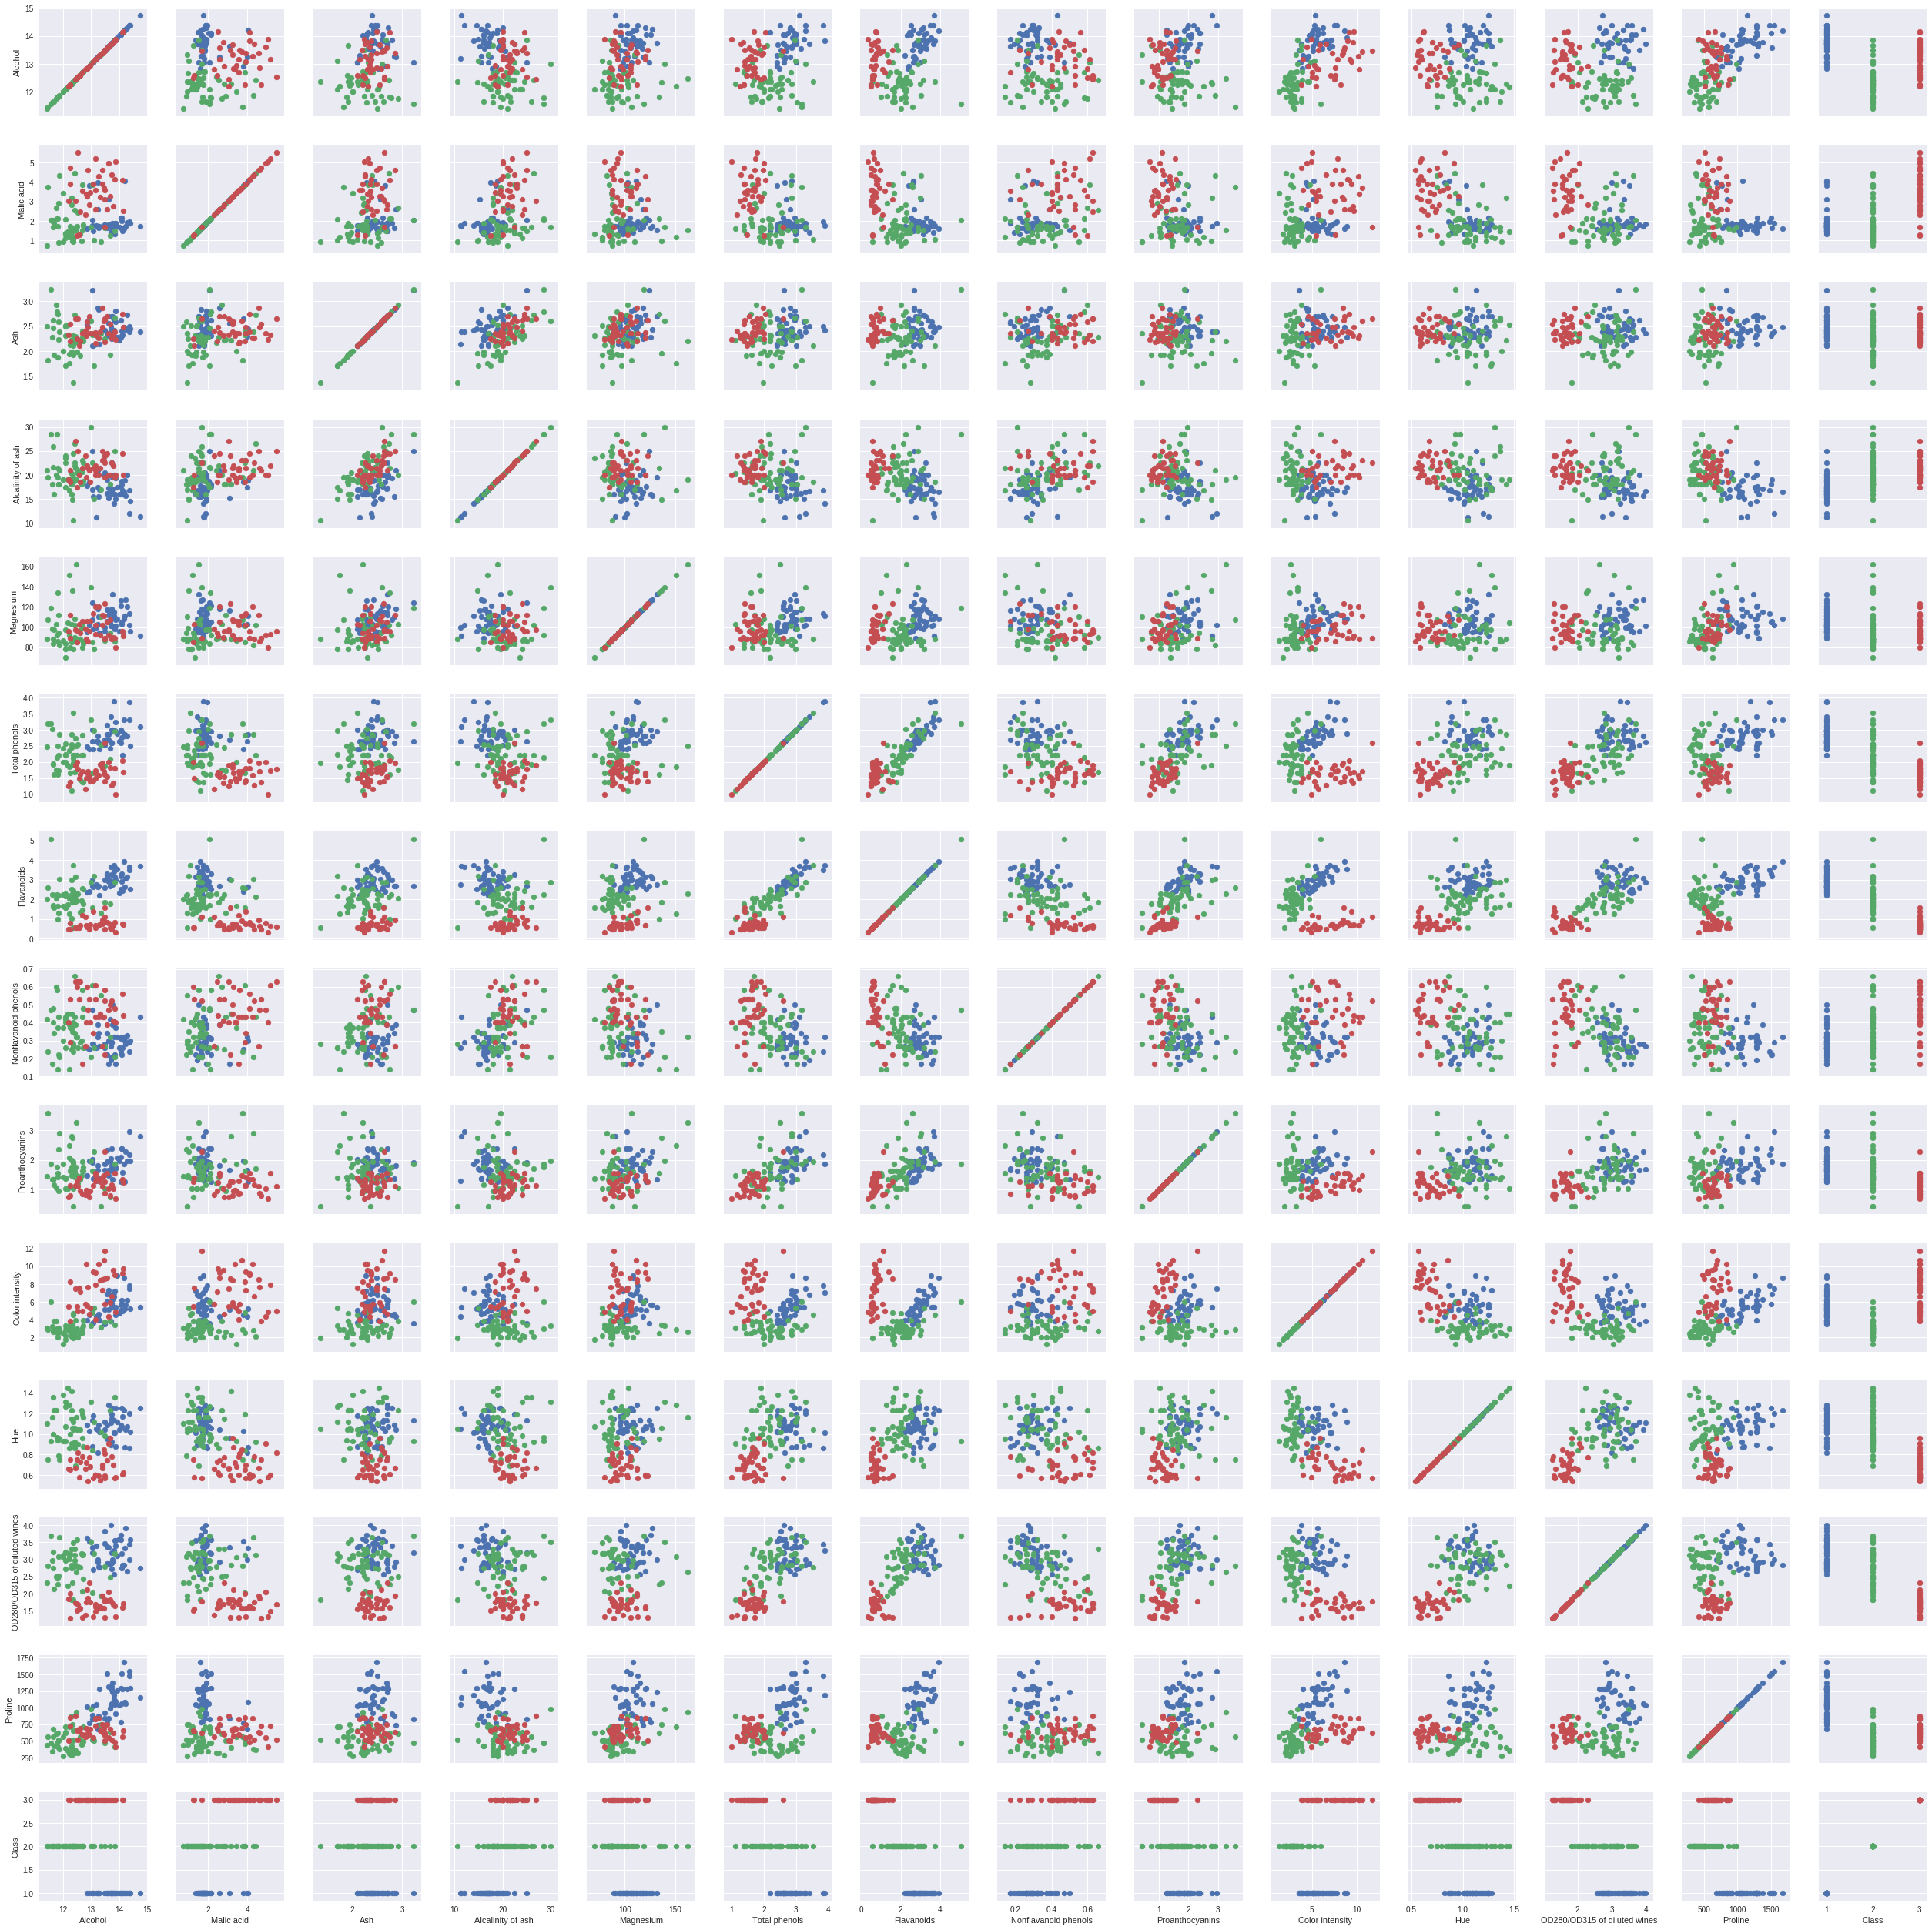

In [5]:
df_for_pairgrid = X_train
df_for_pairgrid['Class'] = y_train

sns.PairGrid(df_for_pairgrid, hue='Class').map(plt.scatter)

После постороения графиков можно сделать вывод, что у нас есть корреляция между нашей целевой переменной и признаками "Flavanoids", "OD280/OD315 of diluted wines", "Total phenols".
Также между собой сильно коррелируют признаки "Flavanoids" и "OD280/OD315 of diluted wines"

**Задача:** *посчитать "руками" (не используя sklearn.metrics) accuracy, precision, recall и f1 для ответов, полученных на предыдущей лабе.*

Загружаем данные предыдущей лабы

In [0]:
wine = datasets.load_wine()
X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier() #создание моделиЭ
knn.fit(X_train, y_train) #обучение модели
y_knn = knn.predict(X_test)
y_knn = np.around(y_knn, decimals = 0).astype(np.int64)

Считаем метрики

In [6]:
#Все относительно класса 0
TP = 0
FP = 0
FN = 0
TN = 0

for i in range(len(y_test)):
  if (y_test[i] == y_knn[i] == 0):
    TP += 1
  elif (y_test[i] != 0 and y_knn[i] == 0):
    FP += 1    
  elif (y_test[i] == 0 and y_knn[i] != 0):
    FN += 1
  else:
    TN += 1    

accuracy = (TP + TN)/(TP + TN + FP + FN)
precision = (TP)/(TP + FP)
recall = (TP)/(TP + FN)
f1 = (2 * precision * recall)/(precision + recall)

print(f"True Positive: {TP}") 
print(f"False Positive: {FP}")
print(f"False Negative: {FN}")
print(f"True Negative: {TN}\n")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

True Positive: 23
False Positive: 1
False Negative: 1
True Negative: 29

Accuracy: 0.9629629629629629
Precision: 0.9583333333333334
Recall: 0.9583333333333334
F1: 0.9583333333333334


И проверяем, что насчитал нам sklearn

In [7]:
print(classification_report(y_test, y_knn, target_names = ['class 0', 'class 1', 'class 2']))

             precision    recall  f1-score   support

    class 0       0.96      0.96      0.96        24
    class 1       0.75      0.83      0.79        18
    class 2       0.60      0.50      0.55        12

avg / total       0.81      0.81      0.81        54



**Задача:** *выбрать и обосновать метрику качества. Попробовать несколько методов машинного обучения из sklearn, посмотреть, какой метод лучше всего подойдет в контексте выбранной метрики (пока без подбора гиперпараметров). Оптимизировать KNN в соответствии с метрикой*

Выберем метрику precision. Нам важно, чтобы метод при внесении новых данных мог с максимальной точность определить, что за вино нам представлено. 

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score

average = 'micro'
for clf in [DecisionTreeClassifier(), SGDClassifier(), SVC(), GaussianNB(), KNeighborsClassifier()]:
    print(f"{clf.__class__.__name__}\nPrecision: {precision_score(y_test, clf.fit(X_train, y_train).predict(X_test), average=average)}\nRecall: {recall_score(y_test, clf.fit(X_train, y_train).predict(X_test), average=average)}\nF1: {f1_score(y_test, clf.fit(X_train, y_train).predict(X_test), average=average)}\n")

DecisionTreeClassifier
Precision: 0.9444444444444444
Recall: 0.9444444444444444
F1: 0.9444444444444444

SGDClassifier
Precision: 0.7222222222222222
Recall: 0.5370370370370371
F1: 0.7037037037037037

SVC
Precision: 0.35185185185185186
Recall: 0.35185185185185186
F1: 0.35185185185185186

GaussianNB
Precision: 0.9629629629629629
Recall: 0.9629629629629629
F1: 0.9629629629629629

KNeighborsClassifier
Precision: 0.8148148148148148
Recall: 0.8148148148148148
F1: 0.8148148148148148



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Из этого маленького теста видно, что нам подходит GaussianNB

Теперь оптимизируем knn в соответсвии с выбранной метрикой

In [9]:
from sklearn.model_selection import RandomizedSearchCV

params = {"n_neighbors": np.arange(1, 81),
          "weights": ["uniform", "distance"],
          "leaf_size": np.arange(1, 100)}

rsearch = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                             param_distributions = params,
                             scoring = 'precision_micro',
                             n_iter = 10)
rsearch.fit(X_train, y_train)
ry_knn = rsearch.predict(X_test)
ry_knn = np.around(ry_knn, decimals = 0).astype(np.int64)

print(f"Precision: {rsearch.best_score_}")
print(f"Best params: {rsearch.best_params_}")



Precision: 0.717741935483871
Best params: {'weights': 'uniform', 'n_neighbors': 36, 'leaf_size': 34}


**Задача:** *взять любой вещественный признак (не бинарный) из своего набора данных, найти максимум значения разобранными методами оптимизации, сравнить с фактическим максимумом*

differential_evolution step 1: f(x)= 1.15
differential_evolution step 2: f(x)= 1.15
differential_evolution step 3: f(x)= 1.15
differential_evolution step 4: f(x)= 1.15
differential_evolution step 5: f(x)= 1.15
differential_evolution step 6: f(x)= 1.15
differential_evolution step 7: f(x)= 1.15
differential_evolution step 8: f(x)= 1.15
differential_evolution step 9: f(x)= 0.98
differential_evolution step 10: f(x)= 0.98
differential_evolution step 11: f(x)= 0.98
differential_evolution step 12: f(x)= 0.98
differential_evolution step 13: f(x)= 0.98
differential_evolution step 14: f(x)= 0.98
differential_evolution step 15: f(x)= 0.98


     fun: 0.98
 message: 'Optimization terminated successfully.'
    nfev: 242
     nit: 15
 success: True
       x: array([146.55482163])

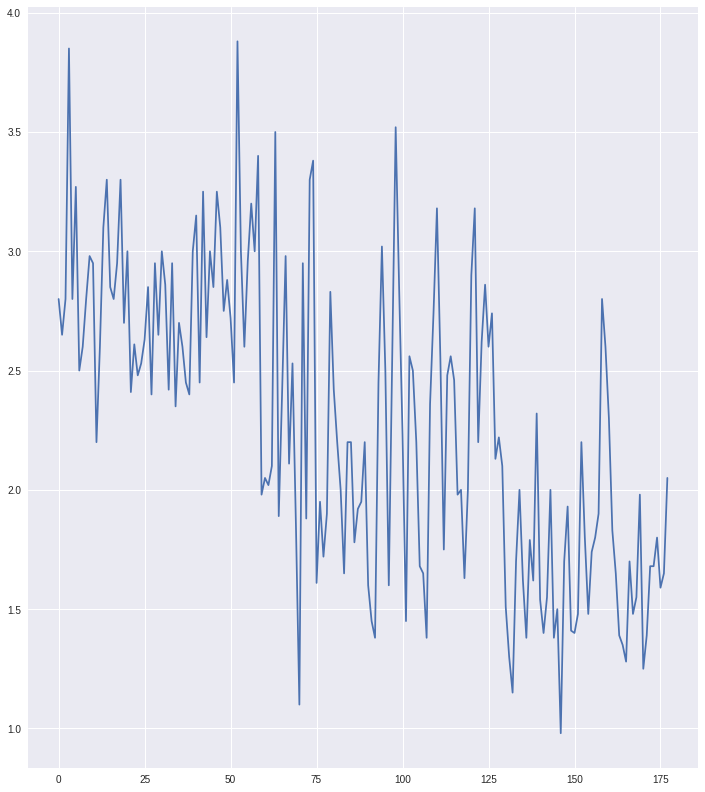

In [6]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import differential_evolution as diff

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names=["Class","Alcohol","Malic acid","Ash","Alcalinity of ash","Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols","Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"])
arr = np.array(data['Total phenols'])


def f(x, *args):
  return arr[int(x)]


x = np.arange(0, 178)
y = np.fromiter(map(f, x), dtype = float)


plt.plot(x, y)
diff(f, [(0, 178)], strategy = 'best1exp', disp = True)

In [72]:
print(f'Минимальный элемент: {arr[np.argmin(arr)]}')
print(f'Максимальный элемент: {arr[np.argmax(arr)]}')

Минимальный элемент: 0.98
Максимальный элемент: 3.88


Локальная оптимизация

In [71]:
res = minimize(f, x0=100, method = 'Nelder-Mead')
print(res)


 final_simplex: (array([[107.5       ],
       [107.49992371]]), array([1.38, 1.38]))
           fun: 1.38
       message: 'Optimization terminated successfully.'
          nfev: 50
           nit: 18
        status: 0
       success: True
             x: array([107.5])
